In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objects as go

# Initial Data Exploration

In [84]:
airbnb_data= pd.read_csv("/Users/admin/Downloads/final-project/AB_NYC_2019.csv")
airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [85]:
airbnb_data.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [86]:
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [87]:
len(airbnb_data[airbnb_data['price'] == 10000])

3

In [88]:
airbnb_data['price'].max()

10000

In [89]:
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Data Cleaning and Wrangling

In [90]:
missing_values = airbnb_data.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [91]:
missing_percent = (missing_values / len(airbnb_data)) * 100
print(missing_percent)

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [92]:
airbnb_data.drop(columns=["id","name", "host_name","last_review"], axis=1, inplace=True)
airbnb_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [93]:
airbnb_data.duplicated().sum()
airbnb_data.drop_duplicates(inplace=True)

In [94]:
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

In [95]:
airbnb_data.dropna(how='any',inplace=True)
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [96]:
airbnb_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [97]:
airbnb_data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [98]:
airbnb_data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [99]:
airbnb_data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [100]:
airbnb_data['neighbourhood'].describe()

count            48895
unique             221
top       Williamsburg
freq              3920
Name: neighbourhood, dtype: object

In [101]:
airbnb_data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [102]:
airbnb_data['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [103]:
airbnb_data = airbnb_data[(airbnb_data['price'] != 0)]

In [104]:
airbnb_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


# Exploratory Data Analysis (EDA)

- (EDA) is a crucial phase of any data science project, as it allows one to understand the dataset's structure, underlying patterns, an potential insights. EDA provides the foundation upon which one can build more advanced analyses and models.

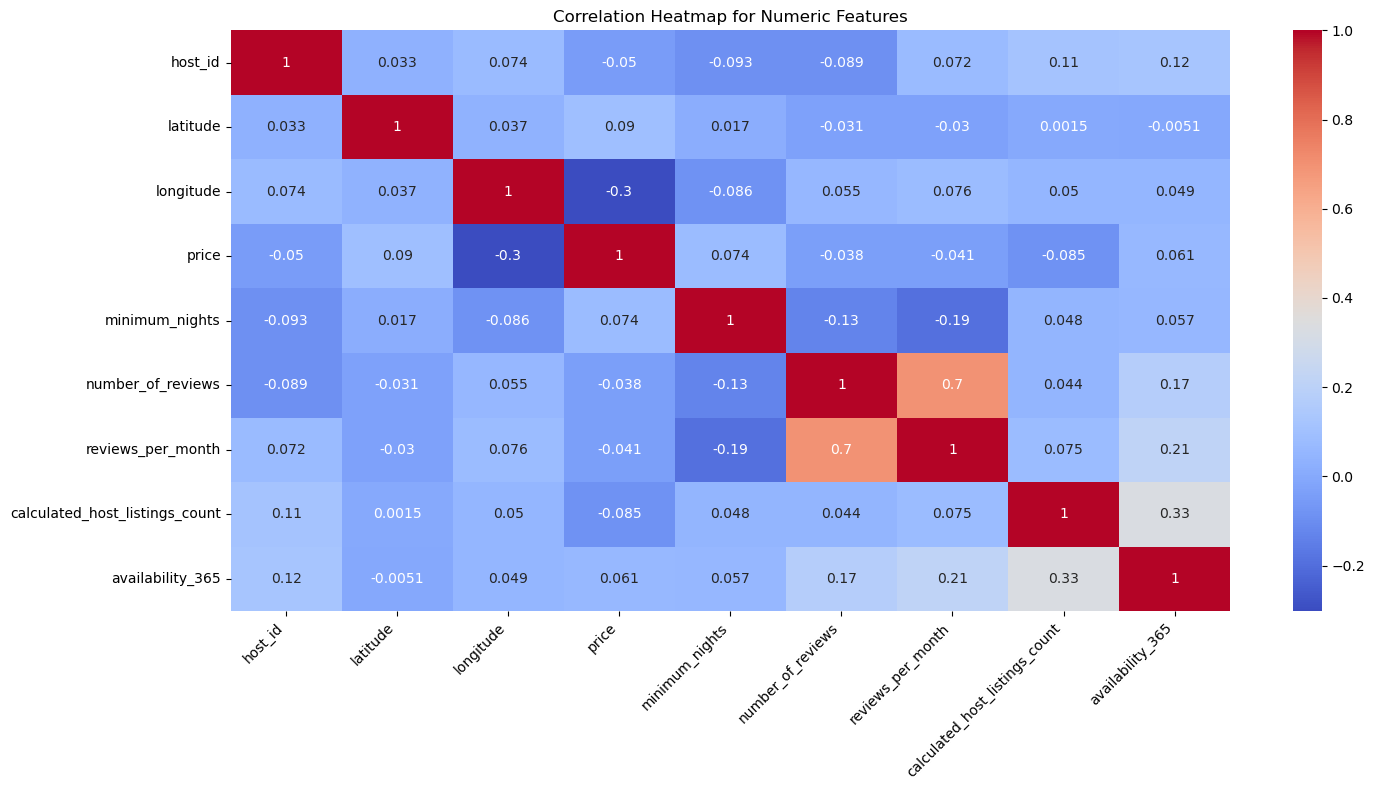

In [105]:
# Correlation between numerical variables
numeric_data = airbnb_data.select_dtypes(include=[float, int])
corr = numeric_data.corr(method='kendall')

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Features')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Univariate Analysis

In [106]:
airbnb_data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

In [107]:
neighbourhoodgroup_counts = airbnb_data['neighbourhood_group'].value_counts()
neighbourhoodgroup_counts

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

/var/folders/cr/41xbbwl92z1_z8mm61y7_jm80000gn/T/ipykernel_5001/381417151.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




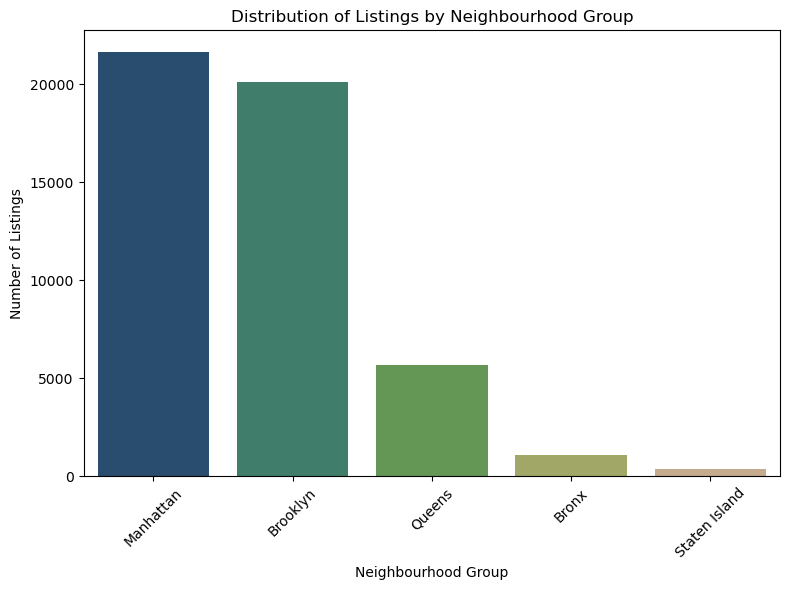

In [108]:
plt.figure(figsize=(8, 6))
sns.barplot(x=neighbourhoodgroup_counts.index, y=neighbourhoodgroup_counts.values, palette='gist_earth')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [109]:
airbnb_data['room_type'].value_counts()

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64

In [110]:
airbnb_data['neighbourhood'].value_counts().head(10)

neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

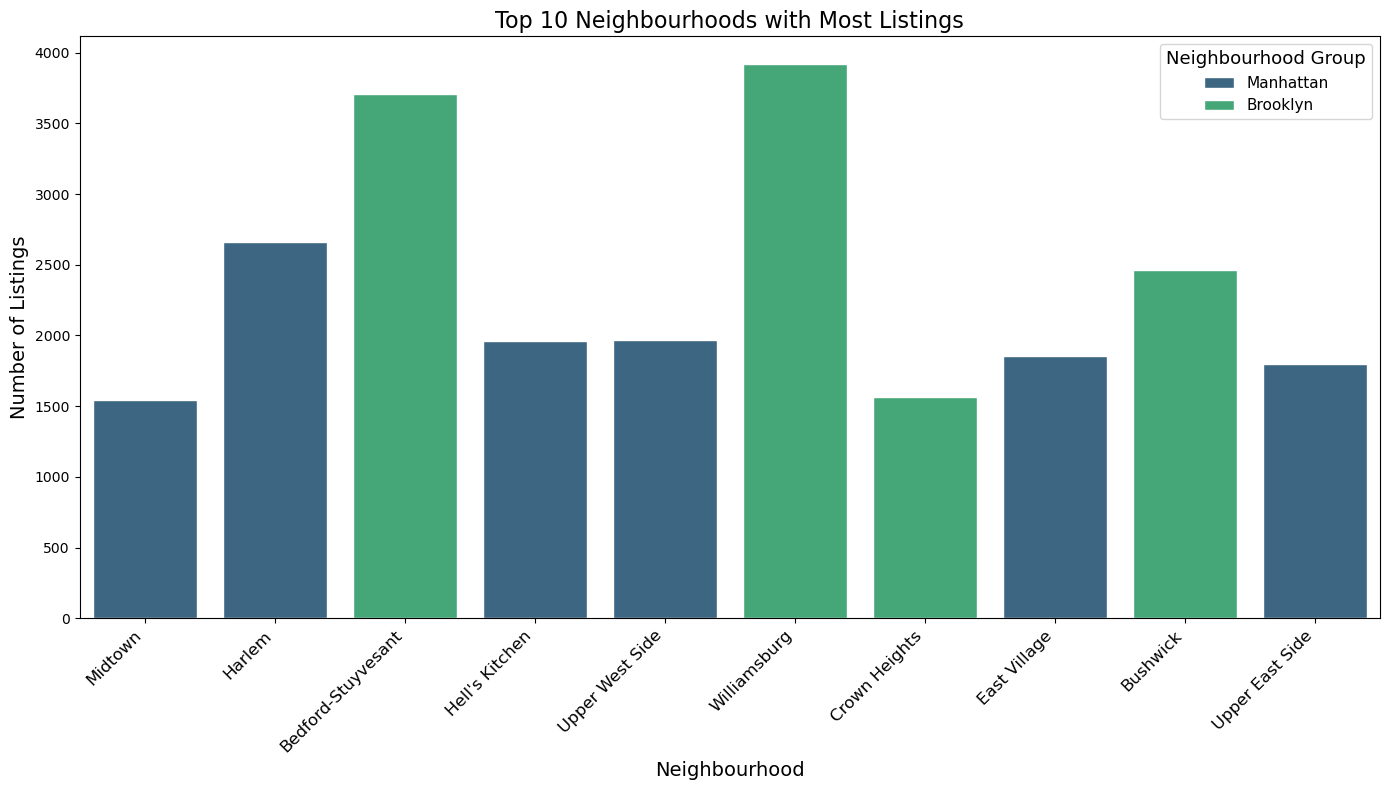

In [111]:
top_neighborhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side', "Hell's Kitchen",
                     'East Village', 'Upper East Side', 'Crown Heights', 'Midtown']

sub_data1 = airbnb_data.loc[airbnb_data['neighbourhood'].isin(top_neighborhoods)]

plt.figure(figsize=(14, 8))
sns.countplot(data=sub_data1, x='neighbourhood', hue='neighbourhood_group', palette='viridis', edgecolor='w')


plt.title('Top 10 Neighbourhoods with Most Listings', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Neighbourhood Group', title_fontsize='13', fontsize='11', loc='upper right')
plt.tight_layout()
#plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.savefig('top 10 neighbourhoods with most listings.png', dpi=300, bbox_inches='tight')
plt.show()

# Bivariate Analysis

In [112]:
neighborhoods = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [113]:
def get_price_stats(airbnb_data, neighborhoods):
    new_price_list = []
    for neighborhood in neighborhoods:
        prices = airbnb_data.loc[airbnb_data['neighbourhood_group'] == neighborhood, 'price']
        i = prices.describe(percentiles=[.25, .50, .75]).loc[['25%', '50%', '75%', 'mean', 'std']]
        i = i.to_frame(name=neighborhood).reset_index()
        i.rename(columns={'index': 'Stats'}, inplace=True)
        new_price_list.append(i.set_index('Stats'))
    return new_price_list

price_stats_list = get_price_stats(airbnb_data, neighborhoods)
stat_df = price_stats_list[0].join(price_stats_list[1:])

In [114]:
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
75%,150.000000,220.000000,110.000000,110.000000,99.000000
mean,124.438915,196.884903,99.517649,114.812332,87.577064
std,186.896837,291.386838,167.102155,277.620403,106.725371


# Feature Engineering and Selection

In [115]:
airbnb_data.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [116]:
airbnb_data= airbnb_data.drop(columns=['host_id','latitude','longitude','number_of_reviews','reviews_per_month'])
airbnb_data

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,1,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,2,9
48891,Brooklyn,Bushwick,Private room,40,4,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,6,2


- Preprocessing


In [117]:
numerical = airbnb_data[['price','minimum_nights','calculated_host_listings_count','availability_365']]
numerical

,price,minimum_nights,calculated_host_listings_count,availability_365
0,149,1,6,365
1,225,1,2,355
2,150,3,1,365
3,89,1,1,194
4,80,10,1,0
...,...,...,...,...
48890,70,2,2,9
48891,40,4,2,36
48892,115,10,1,27
48893,55,1,6,2


In [118]:
categorical = airbnb_data[['neighbourhood_group','neighbourhood','room_type']]
categorical

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [119]:
categorical_num= pd.get_dummies(categorical)
categorical_num

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
48891,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
48892,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48893,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [120]:
features = pd.concat([categorical_num, numerical], axis = 1).drop(columns=['price'])
features

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,calculated_host_listings_count,availability_365
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,1,6,365
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,1,2,355
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,3,1,365
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,1,1,194
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,2,2,9
48891,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,4,2,36
48892,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,10,1,27
48893,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,1,6,2


In [121]:
target =airbnb_data['price']
target

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48884, dtype: int64

- Perform Train Test Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [123]:
X_train.shape

(39107, 232)

- Normalization / Feature Scaling

In [124]:
normalizer = MinMaxScaler()

In [125]:
normalizer.fit(X_train)

MinMaxScaler()

In [126]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [127]:
X_train_norm

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.20256205e-03, 0.00000000e+00, 8.76712329e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.60128102e-03, 0.00000000e+00, 3.20547945e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.40192154e-03, 1.22699387e-02, 2.43835616e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.00640512e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.00640512e-04, 0.00000000e+00, 3.47945205e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.60128102e-03, 0.00000000e+00, 7.01369863e-01]])

In [128]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,calculated_host_listings_count,availability_365
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.003203,0.00000,0.876712
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001601,0.00000,0.320548
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002402,0.01227,0.243836
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.00000,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000801,0.00000,0.054795


In [129]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,calculated_host_listings_count,availability_365
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.003203,0.000000,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.003203,0.000000,0.000000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.006135,0.241096
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000801,0.003067,0.263014
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000


In [130]:
X_train_norm

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,calculated_host_listings_count,availability_365
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.003203,0.000000,0.876712
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001601,0.000000,0.320548
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002402,0.012270,0.243836
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000801,0.000000,0.054795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.868493
39103,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.023219,0.067485,0.939726
39104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000801,0.000000,0.000000
39105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000801,0.000000,0.347945


In [131]:
y_train

2201      95
47843    185
30511     55
44290     52
47654     50
        ... 
21243    175
45902    210
42624     49
43578    159
2732     179
Name: price, Length: 39107, dtype: int64

# Model Selection

- KNeighbour Regressor 

In [132]:
knn = KNeighborsRegressor(n_neighbors=15)

- Training KNN to normalized data

In [133]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=15)

- Evaluate model's performance

In [134]:
knn.score(X_test_norm, y_test)

0.10477281653937798

In [135]:
pred_knn = knn.predict(X_test)
pred_knn

array([132.06666667, 170.66666667, 139.93333333, ...,  91.66666667,
       263.        , 161.8       ])

In [136]:
y_test.values

array([105,  68,  75, ...,  80, 106,  49])

In [137]:
X_test

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,calculated_host_listings_count,availability_365
3474,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,5,1,0
37387,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,5,1,0
44147,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,1,3,88
40228,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,2,2,96
36090,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24115,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,3,1,0
22969,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,1,4,89
5374,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,4,1,196
22841,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,2,2,0


- Create a gauge chart in Plotly

In [138]:
r2_score_knn = 0.10  # 
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=r2_score_knn,
    number={'suffix': "%", 'font': {'size': 48}},
    title={'text': "KNN R² Score"},
    gauge={
        'axis': {'range': [0, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "blue"},
        'steps': [
            {'range': [0, 0.33], 'color': 'yellow'},
            {'range': [0.33, 0.66], 'color': 'orange'},
            {'range': [0.66, 1], 'color': 'red'}
        ]},
    domain={'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(
    margin={'l': 20, 'r': 20, 't': 60, 'b': 20},
    height=300,
    font=dict(color="darkblue", family="Arial")
)
fig.show()

- Linear Regression

In [139]:
lin_reg = LinearRegression() 

In [140]:
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

In [141]:
pred = lin_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False)) 
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 2238264830.420722
RMSE 128538937633.21376
R2 score -2.7245825271746134e+17


In [142]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train.columns, lin_reg.coef_)}
lin_reg_coef

{'neighbourhood_group_Bronx': -104547912937008.02,
 'neighbourhood_group_Brooklyn': -12161319568301.625,
 'neighbourhood_group_Manhattan': 144629962504602.0,
 'neighbourhood_group_Queens': 10342145762640.438,
 'neighbourhood_group_Staten Island': -6102987461428.824,
 'neighbourhood_Allerton': 91421882189428.47,
 'neighbourhood_Arden Heights': -7023043286179.773,
 'neighbourhood_Arrochar': -7023043286139.219,
 'neighbourhood_Arverne': -23468176510156.6,
 'neighbourhood_Astoria': -23468176510181.95,
 'neighbourhood_Bath Beach': -964711179290.1934,
 'neighbourhood_Battery Park City': -157755993251892.66,
 'neighbourhood_Bay Ridge': -964711179214.5566,
 'neighbourhood_Bay Terrace': -23468176510181.195,
 'neighbourhood_Bay Terrace, Staten Island': -7023043286169.611,
 'neighbourhood_Baychester': 91421882189406.66,
 'neighbourhood_Bayside': -23468176510142.54,
 'neighbourhood_Bayswater': -23468176510207.43,
 'neighbourhood_Bedford-Stuyvesant': -964711179254.042,
 'neighbourhood_Belle Harbor'

- Decision Tree

In [143]:
tree = DecisionTreeRegressor(max_depth=5)

In [144]:
tree.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=5)

In [145]:
#pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test, y_test))

MAE 2238264830.420722
RMSE 128538937633.21376
R2 score -0.08475755236614879


In [146]:
tree_importance = {feature : importance for feature, importance in zip(X_train.columns, tree.feature_importances_)}
tree_importance 

{'neighbourhood_group_Bronx': 0.0,
 'neighbourhood_group_Brooklyn': 0.0,
 'neighbourhood_group_Manhattan': 0.06138671408682638,
 'neighbourhood_group_Queens': 0.0,
 'neighbourhood_group_Staten Island': 0.0,
 'neighbourhood_Allerton': 0.0,
 'neighbourhood_Arden Heights': 0.0,
 'neighbourhood_Arrochar': 0.0,
 'neighbourhood_Arverne': 0.0,
 'neighbourhood_Astoria': 0.10776884405934421,
 'neighbourhood_Bath Beach': 0.0,
 'neighbourhood_Battery Park City': 0.014265101827840129,
 'neighbourhood_Bay Ridge': 0.0,
 'neighbourhood_Bay Terrace': 0.0,
 'neighbourhood_Bay Terrace, Staten Island': 0.0,
 'neighbourhood_Baychester': 0.0,
 'neighbourhood_Bayside': 0.009243062418561456,
 'neighbourhood_Bayswater': 0.0,
 'neighbourhood_Bedford-Stuyvesant': 0.012100395574086984,
 'neighbourhood_Belle Harbor': 0.0,
 'neighbourhood_Bellerose': 0.0,
 'neighbourhood_Belmont': 0.0,
 'neighbourhood_Bensonhurst': 0.0,
 'neighbourhood_Bergen Beach': 0.0,
 'neighbourhood_Boerum Hill': 0.0,
 'neighbourhood_Borough 

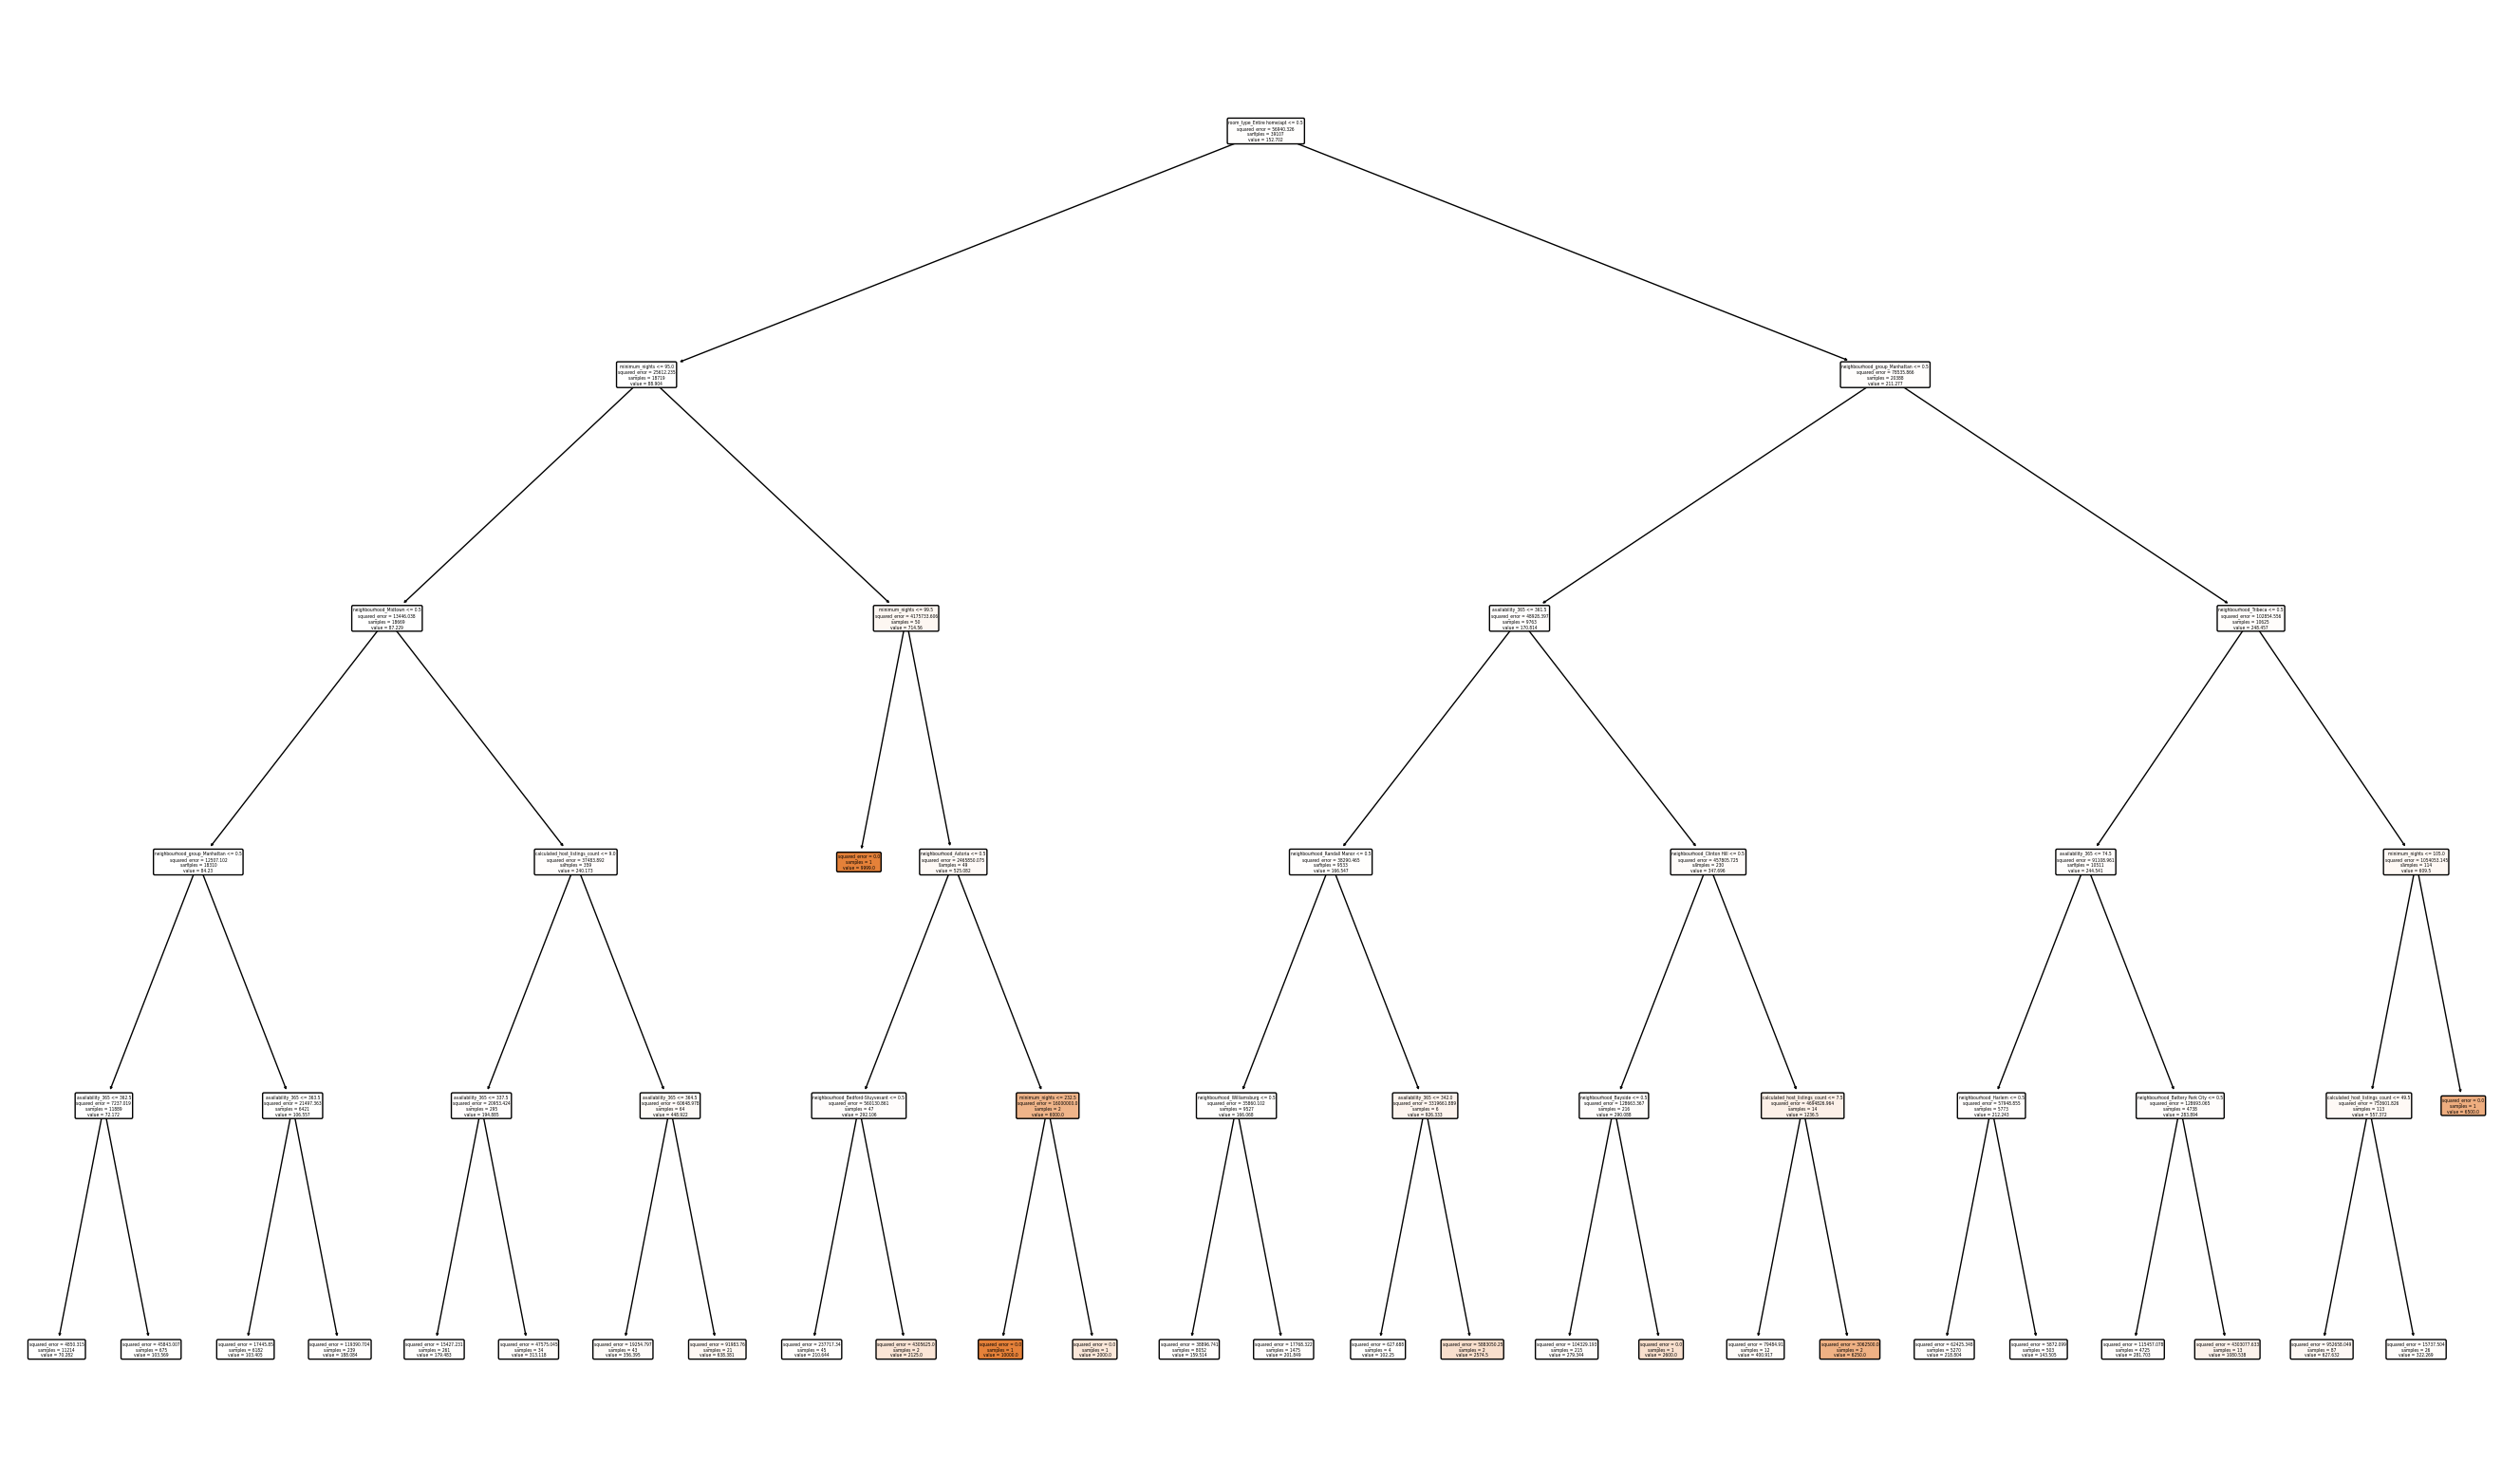

In [147]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()

# Ensemble Models 

# Bagging and Pasting

In [148]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=50),
                               n_estimators=100,
                               max_samples = 1000)

- Training KNN to normalized data

In [149]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=50),
                 max_samples=1000, n_estimators=100)

In [150]:
pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 68.3493523901547
RMSE 231.61918667993822
R2 score 0.11533342387769907


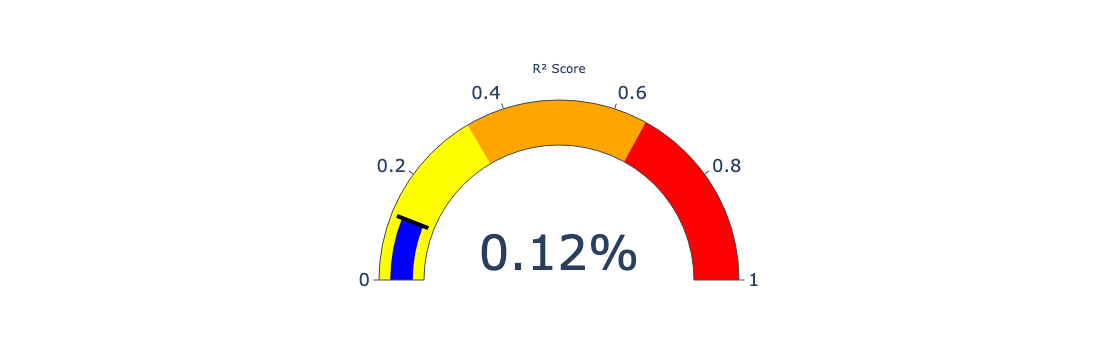

<Figure size 640x480 with 0 Axes>

In [151]:
import plotly.graph_objects as go
r2_score = 0.12
# Create a gauge chart in Plotly
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=r2_score,
    number={'suffix': "%", 'font': {'size': 48}},
    title={'text': "R² Score"},
    gauge={
        'axis': {'range': [0, 1]},
        'bar': {'color': "blue"},
        'steps': [
            {'range': [0, 0.33], 'color': 'yellow'},
            {'range': [0.33, 0.66], 'color': 'orange'},
            {'range': [0.66, 1], 'color': 'red'}
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': r2_score}}))
fig.update_layout(font_size=18)
plt.savefig('Accuracy Level 1.png', dpi=300, bbox_inches='tight')
fig.show()

# Random Forest

In [152]:
forest = RandomForestRegressor(n_estimators=20, max_depth=10)

In [153]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=10, n_estimators=20)

In [154]:
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 69.51420337394859
RMSE 244.23910700823595
R2 score 0.016303872654746976


# AdaBoost

In [155]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=100)

In [156]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [157]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 71.60174861925944
RMSE 282.97079044973776
R2 score -0.32042509839475475


# Gradient Boosting

In [158]:
gb_reg = GradientBoostingRegressor(max_depth=20, n_estimators=100)

In [159]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [160]:
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 70.27710470896078
RMSE 268.1633772418564
R2 score -0.18584926232536159


# Hyperparameter Tuning

# Grid Search 

In [161]:
grid_ = {"n_estimators": [50, 100, 500],
        "estimator__max_leaf_nodes": [250, 500, 1000, None],
        "estimator__max_depth":[10,20]}

In [162]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

In [163]:
model_ = GridSearchCV(estimator = ada_reg, param_grid = grid_, cv=5)

In [164]:
model_.fit(X_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
             param_grid={'estimator__max_depth': [10, 20],
                         'estimator__max_leaf_nodes': [250, 500, 1000, None],
                         'n_estimators': [50, 100, 500]})

In [165]:
model_.best_params_

{'estimator__max_depth': 10,
 'estimator__max_leaf_nodes': None,
 'n_estimators': 100}

In [166]:
best_model = model_.best_estimator_

In [167]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 77.9137627466817
RMSE 280.01706680848196
R2 score -0.2930030784874371


# Grid Search - KNeighborsRegressor

In [168]:
knn = KNeighborsRegressor()

In [169]:
gridsearch = GridSearchCV(knn, param_grid = {"n_neighbors":[5,10,15,20]}, cv= 5)

In [170]:
gridsearch.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20]})

In [171]:
gridsearch.best_params_

{'n_neighbors': 20}

In [172]:
pred = gridsearch.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 69.44692646005932
RMSE 232.65178755344968
R2 score -0.2930030784874371


# Random Search

In [173]:
grid_rs = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)],
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

In [174]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

In [175]:
model_rs = RandomizedSearchCV(estimator = ada_reg , param_distributions = grid_rs, n_iter = 10, cv = 5, n_jobs = -1)

In [176]:
model_rs.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [182]:
model_rs.best_params_

{'n_estimators': 600,
 'estimator__max_leaf_nodes': 777,
 'estimator__max_depth': 110}

In [184]:
best_model= model_rs.best_estimator_

In [186]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 69.15588505784301
RMSE 252.00137328945536
R2 score -0.0472162430130052
